In [1]:
## Datos exploratorios de Secop

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
pd.options.display.max_columns = 500


In [9]:
#from google.colab import files
#uploaded = files.upload()

import io
df2 = pd.read_csv('SECOP_I.csv')

c:\users\jreyes\appdata\local\continuum\anaconda3\envs\exploratoriohanor\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,38,42,44,57,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df2.head(1)

,UID,Anno Cargue SECOP,Anno Firma del Contrato,Nivel Entidad,Orden Entidad,Nombre de la Entidad,NIT de la Entidad,Código de la Entidad,ID Tipo de Proceso,Tipo de Proceso,Estado del Proceso,Causal de Otras Formas de Contratacion Directa,ID Regimen de Contratacion,Regimen de Contratacion,ID Objeto a Contratar,Objeto a Contratar,Detalle del Objeto a Contratar,Tipo de Contrato,Municipio Obtencion,Municipio Entrega,Municipios Ejecucion,Fecha de Cargue en el SECOP,Numero de Constancia,Numero de Proceso,Numero del Contrato,Cuantia Proceso,ID Grupo,Nombre Grupo,ID Familia,Nombre Familia,ID Clase,Nombre Clase,ID Ajudicacion,Tipo Identifi del Contratista,Identificacion del Contratista,Nom Raz Social Contratista,Dpto y Muni Contratista,Tipo Doc Representante Legal,Identific del Represen Legal,Nombre del Represen Legal,Fecha de Firma del Contrato,Fecha Ini Ejec Contrato,Plazo de Ejec del Contrato,Rango de Ejec del Contrato,Tiempo Adiciones en Dias,Tiempo Adiciones en Meses,Fecha Fin Ejec Contrato,Compromiso Presupuestal,Cuantia Contrato,Valor Total de Adiciones,Valor Contrato con Adiciones,Objeto del Contrato a la Firma,ID Origen de los Recursos,Origen de los Recursos,Codigo BPIN,Proponentes Seleccionados,Calificacion Definitiva,ID Sub Unidad Ejecutora,Nombre Sub Unidad Ejecutora,Moneda,EsPostConflicto,Ruta Proceso en SECOP I,Marcacion Adiciones,Posicion Rubro,Nombre Rubro,Valor Rubro,Sexo Representante Legal Proveedor,Pilar Acuerdo Paz,Punto Acuerdo Paz
0,15-4-4516361-4148139,2015,2015,NACIONAL,NACIONAL DESCENTRALIZADO,ARTESANÍAS DE COLOMBIA,No registra,NaN,4,Régimen Especial,Liquidado,Ninguna,2,Régimen Especial,81000000,"Servicios Basados en Ingeniería, Investigación...",.,Otro Tipo de Contrato,No definido,No definido,Bogotá D.C. - Bogotá D.C.,12/21/2015,15-4-4516361,ADC-2015-638,ADC-2015-638,"3,450,362.00",F,[F] Servicios,8111,Servicios informáticos,811122,Mantenimiento y soporte de software,4148139,Nit de Persona Jurídica,900.040.754-0,VALUE ADDED INFORMATION TECHNOLOGIES SOLUTIONS...,Bogotá D.C.,Cédula de Ciudadanía,8746141,EDUARDO JAVIER FRANCO MACKENZIE,03/12/2015,06/12/2015,25,D,0,0,31/12/2015,No registra,"3,450,362.00",0.00,"3,450,362.00",Garantizar la continuidad de la herramienta de...,2,Presupuesto Nacional/Territorial,0,No definido,No definido,0,No definida,Pesos (COP),No Definido,https://www.contratos.gov.co/consultas/detalle...,No,No Definido,No Definido,0,ND,No Definido,No Definido


# Sección de análisis descriptivo básico

In [23]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Código de la Entidad,13106.0,1.225677e+08,3.375452e+07,2110145.0,116001000.0,118004002.0,118004002.0,299000061.0
Tiempo Adiciones en Meses,6543008.0,1.141444e-01,1.365613e+00,-6.0,0.0,0.0,0.0,642.0


In [21]:
# Selección de columnas de interes

df2=df2[["Tipo Doc Representante Legal","Dpto y Muni Contratista","Código de la Entidad","Tiempo Adiciones en Meses","Nombre de la Entidad","Estado del Proceso","Tipo de Contrato","Municipios Ejecucion",
"Cuantia Contrato","Valor Total de Adiciones","Objeto del Contrato a la Firma","Moneda"]]

# Limpieza de los 12 campos de interés inciales

## Limpieza Columna Tipo Doc Representante Legal

In [28]:
df2["Tipo Doc Representante Legal"].unique()

array(['Cédula de Ciudadanía', 'Nit de Persona Natural',
       'Nit de Persona Jurídica', 'Cédula de Extranjería',
       'Nit de Extranjería', 'Pasaporte', 'Sociedades Extranjeras',
       'Carné Diplomático', 'Tarjeta de Identidad', 'Nuip',
       'Número de Fideicomiso'], dtype=object)

Cambiar las tildes por texto. Memory error no pude limpiar la db

## Limpieza Columna "Dpto y Muni Contratista"

In [38]:
Dptos=df2["Dpto y Muni Contratista"].unique()
sorted(Dptos)

['Abu Dhabi',
 'Aguascalientes',
 'Ahvenanmaa',
 'Aizkraukles',
 'Alabama',
 'Alajuela',
 'Alaska',
 'Alberta',
 'Alsacia',
 'Alta Austria',
 'Amazonas',
 'Amsterdam',
 'Andalucía',
 'Andorra la Vella',
 'Antigua',
 'Antioquia',
 'Antwerpen',
 'Appenzell',
 'Apure',
 'Aragua',
 'Aragón',
 'Arauca',
 'Arequipa',
 'Argelia',
 'Arizona',
 'Arkansas',
 'Aruba',
 'Ashdod',
 'Asunción',
 'Atlántico',
 'Auckland',
 'Australian Capital Territory',
 'Austria Occidental',
 'Avellino',
 'Azerbaiyán',
 'Azuay',
 'Badahsâr',
 'Baden - Wurttermberg',
 'Badgîs',
 'Bahia',
 'Baja California',
 'Baja-Normandía',
 'Balboa',
 'Balh',
 'Barinas',
 'Base',
 'Basse-Terre',
 'Baviera',
 'Beer Sheba',
 'Belgrado',
 'Belmopán',
 'Berlín',
 'Bern',
 'Bihar',
 'Blekinge',
 'Bocas del Toro',
 'Bogotá D.C.',
 'Bolivar',
 'Bolonia',
 'Bolívar',
 'Borgoña',
 'Boyacá',
 'Brandemburg',
 'Bremen',
 'Brescia',
 'Bretaña',
 'Bruselas',
 'Bucuresti',
 'Buenos Aires',
 'Bâmyân',
 'Cabo Verde',
 'Caldas',
 'California',
 'C

In [34]:
cambiar='Castilla y León','Castilla-La Mancha',
eliminar=    'Distrito Federal','Región Metropolitana',
cambiar='Ciudad de La Habana','La Habana',
cambiar= 'San Salvador', 'San Salvador and Rum Cay',

## Limpieza de columna "Código de la Entidad"


In [56]:
df2[pd.notna(df2["Código de la Entidad"])].shape

(13106, 12)

In [57]:
df2["Código de la Entidad"].shape

(6543008,)

Eliminar entidades con registro = NAN?

## Limpieza de columna Tiempo Adiciones en Meses

In [58]:
df2["Tiempo Adiciones en Meses"].unique()

array([  0,   2,   1,   6,  22,   7,   4,  13,  14,   3,  36,   5,  12,
        31,  17,   8,  11,  24,   9,  16,  37,  48,  10,  18,  15,  33,
        25,  19,  90,  60,  20, 190,  67, 105,  21,  30,  29,  27, 106,
        34, 368,  75,  73,  57, 142,  28,  35,  42,  32, 103,  45,  52,
        61, 175,  91,  65,  62,  77,  76,  49,  74,  54,  43, 184,  26,
       117,  50,  66,  70,  46, 460,  39,  81,  23,  82,  44, 176, 168,
        40,  41,  59,  84,  72, 130,  55,  38, 121, 120, 135, 119, 110,
       115,  80,  97,  89, 174,  63, 107,  56, 102,  93,  85,  51, 140,
       118,  53, 150, 630, 165,  64, 148,  78,  83, 132, 133, 144,  58,
       642, 111,  47, 108,  92, 112, 116, 113, 104,  95,  98, 100, 122,
        88,  96, 149,  86,  87, 400,  79, 167,  -6, 139,  69, 221,  94,
        68,  -2, 154, 127, 181,  71,  -1, 126, 163, 136, 180,  99, 164,
       173, 109, 147, 320, 396], dtype=int64)

In [59]:
df2[df2["Tiempo Adiciones en Meses"]<0]

,Tipo Doc Representante Legal,Dpto y Muni Contratista,Código de la Entidad,Tiempo Adiciones en Meses,Nombre de la Entidad,Estado del Proceso,Tipo de Contrato,Municipios Ejecucion,Cuantia Contrato,Valor Total de Adiciones,Objeto del Contrato a la Firma,Moneda
4191652,Cédula de Ciudadanía,Bogotá D.C.,NaN,-6,ESCUELA SUPERIOR DE GUERRA GENERAL RAFAEL REYE...,Liquidado,Prestación de Servicios,Bogotá D.C. - Bogotá D.C.,"5,099,592.00",0.00,SERVICIO DE HOSTING PARA LA PAGINA WEB E INTRA...,Pesos (COP)
4763857,Cédula de Ciudadanía,Bogotá D.C.,NaN,-2,AUTORIDAD NACIONAL DE LICENCIAS AMBIENTALES (A...,Celebrado,Arrendamiento,Bogotá D.C. - Bogotá D.C.,"97,119,440.00","39,730,680.00",Contratar el arrendamiento de una (1) camione...,Pesos (COP)
5164521,Cédula de Ciudadanía,Norte De Santander,NaN,-1,NORTE DE SANTANDER - CONCEJO MUNICIPIO DE LOS ...,Liquidado,Prestación de Servicios,Norte De Santander - Los Patios,"2,500,000.00",0.00,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS E...,Pesos (COP)


Eliminar los 3 registos con meses negativos

## Limpieza de columna Tiempo Adiciones en Meses

In [65]:
A=df2["Nombre de la Entidad"].iloc[0:2000000]
B=df2["Nombre de la Entidad"].iloc[2000000:4000000]
C=df2["Nombre de la Entidad"].iloc[4000000:]

Sin memoria

In [ ]:
Limpieza de columna Tiempo Adiciones en Meses

In [69]:
df2["Estado del Proceso"].unique()

MemoryError: Unable to allocate array with shape (6543008,) and data type int64

In [0]:
## limpieza de valores economicos

df2['Cuantia Contrato'] =[x.replace(",","") for x in df2["Cuantia Contrato"]]
df2['Valor Total de Adiciones']=[x.replace(",","") for x in df2['Valor Total de Adiciones']]

df2['Cuantia Contrato']=[float(x) for x in df2["Cuantia Contrato"]]
df2['Valor Total de Adiciones']=[float(x) for x in df2['Valor Total de Adiciones']]

In [0]:
df2['LogCuantia_Contrato'] = [np.log(x) if x != 0 else 0 for x  in df2["Cuantia Contrato"]]
df2['LogValorTotalAdiciones']=[np.log(x) if x != 0 else 0 for x  in df2['Valor Total de Adiciones']]

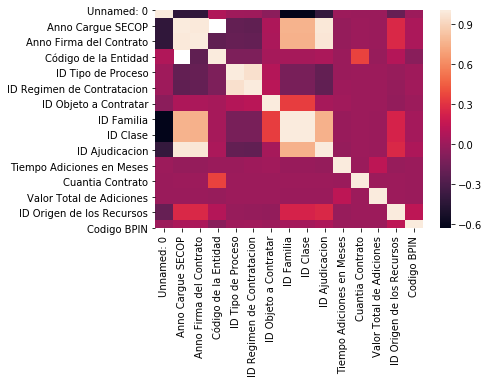

In [0]:
## Matriz de correlación
sns.heatmap(df2.corr())

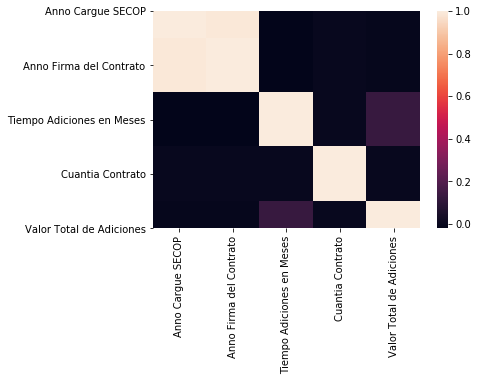

In [0]:
sns.heatmap(df2[["Anno Cargue SECOP","Anno Firma del Contrato","Tiempo Adiciones en Meses","Cuantia Contrato","Valor Total de Adiciones"]].corr())

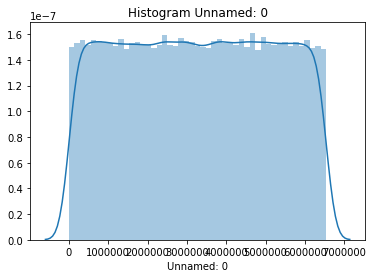

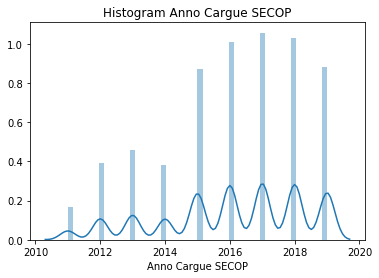

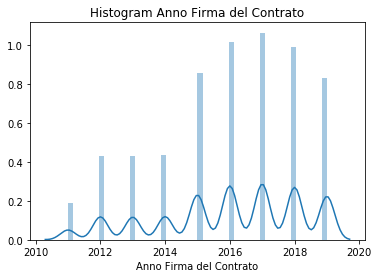

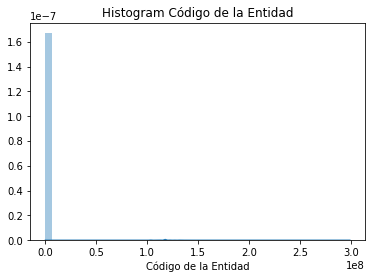

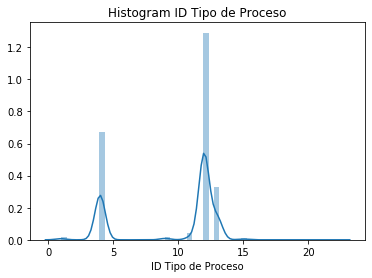

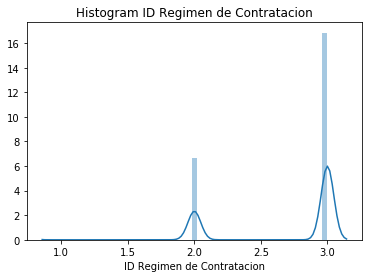

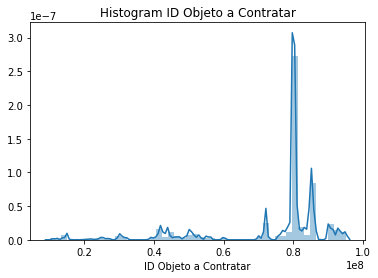

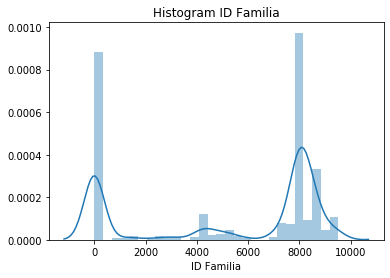

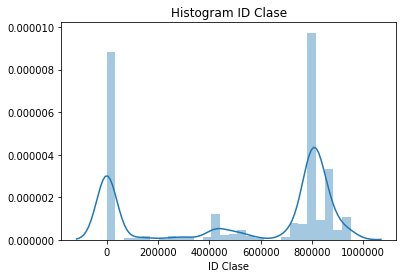

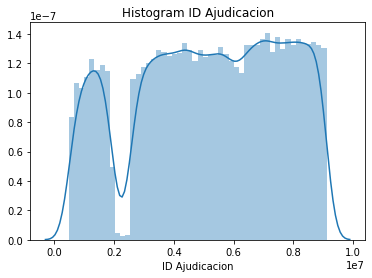

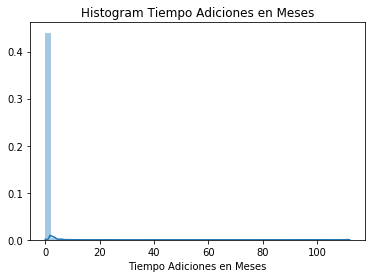

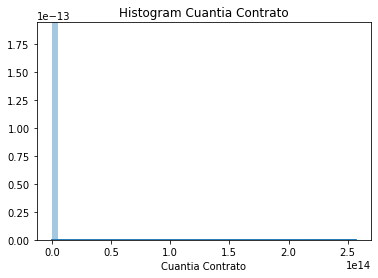

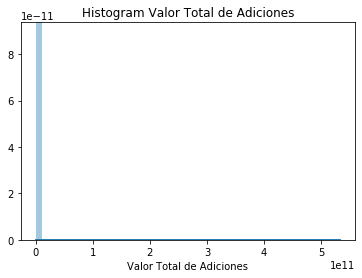

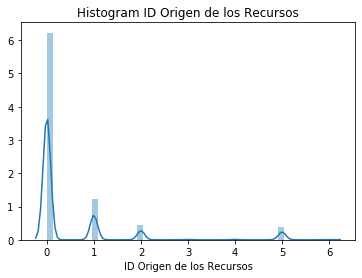

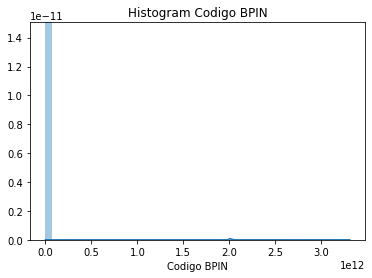

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

for i in df2.select_dtypes(exclude=['object']).columns.unique():
    sns.distplot(df2[i].fillna(-1))
    plt.title('Histogram {}'.format(i))
    plt.figure()

In [0]:
## Tablas de contingencia e histogramas de conteos, sumatorias y promedios de sanciones

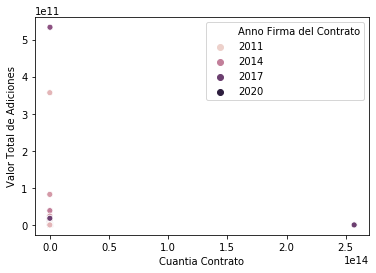

In [0]:
sns.scatterplot(data=df2,x='Cuantia Contrato',y='Valor Total de Adiciones',hue="Anno Firma del Contrato")

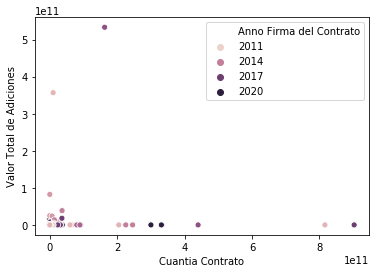

In [0]:
sns.scatterplot(data=df2[df2['Cuantia Contrato']<1e12],x='Cuantia Contrato',y='Valor Total de Adiciones',hue="Anno Firma del Contrato")

In [0]:
### contratos con firmas mayores a 2020
df2[df2["Anno Firma del Contrato"]==2020]

,Unnamed: 0,UID,Anno Cargue SECOP,Anno Firma del Contrato,Nivel Entidad,Orden Entidad,Nombre de la Entidad,NIT de la Entidad,Código de la Entidad,ID Tipo de Proceso,Tipo de Proceso,Estado del Proceso,Causal de Otras Formas de Contratacion Directa,ID Regimen de Contratacion,Regimen de Contratacion,ID Objeto a Contratar,Objeto a Contratar,Detalle del Objeto a Contratar,Tipo de Contrato,Municipio Obtencion,Municipio Entrega,Municipios Ejecucion,Fecha de Cargue en el SECOP,Numero de Constancia,Numero de Proceso,Numero del Contrato,Cuantia Proceso,ID Grupo,Nombre Grupo,ID Familia,Nombre Familia,ID Clase,Nombre Clase,ID Ajudicacion,Tipo Identifi del Contratista,Identificacion del Contratista,Nom Raz Social Contratista,Dpto y Muni Contratista,Tipo Doc Representante Legal,Identific del Represen Legal,Nombre del Represen Legal,Fecha de Firma del Contrato,Fecha Ini Ejec Contrato,Plazo de Ejec del Contrato,Rango de Ejec del Contrato,Tiempo Adiciones en Dias,Tiempo Adiciones en Meses,Fecha Fin Ejec Contrato,Compromiso Presupuestal,Cuantia Contrato,Valor Total de Adiciones,Valor Contrato con Adiciones,Objeto del Contrato a la Firma,ID Origen de los Recursos,Origen de los Recursos,Codigo BPIN,Proponentes Seleccionados,Calificacion Definitiva,ID Sub Unidad Ejecutora,Nombre Sub Unidad Ejecutora,Moneda,EsPostConflicto,Ruta Proceso en SECOP I,Marcacion Adiciones,Posicion Rubro,Nombre Rubro,Valor Rubro,Sexo Representante Legal Proveedor,Pilar Acuerdo Paz,Punto Acuerdo Paz


In [0]:
aggfun={'Cuantia Contrato':["count","min","max","mean","sum"]}
#df2.groupby(["Nombre Contratista","Nombre Entidad"]).agg(aggfun)

In [0]:
# agrupación de contratista

In [0]:
df2.groupby(["Nombre de la Entidad"]).agg("count").sort_values(by='Cuantia Contrato')['Cuantia Contrato']

Nombre de la Entidad
CUNDINAMARCA - CONCEJO MUNICIPAL DE CHÍA                                                                        1
BOGOTÁ D.C. - IED. CARLOS PIZARRO LEON GOMEZ                                                                    1
BOYACÁ - SERVITEATINOSAMACA S.A. E.S.P. - SAMACA                                                                1
QUINDÍO - INSTITUCIÓN EDUCATIVA LAS COLINAS - ARMENIA                                                           1
BOYACÁ - UNIDAD ADMINISTRATIVA ESPECIAL DE CIENCIA  TECNOLOGIA E INNOVACION DEL MUNICIPIO DE TUNJA UMCITI       1
                                                                                                             ... 
ANTIOQUIA - HOSPITAL GENERAL DE MEDELLÍN                                                                     1144
DIRECCIÓN GENERAL DE LA POLICÍA NACIONAL (PONAL)                                                             1175
VALLE DEL CAUCA - ALCALDÍA MUNICIPIO DE CALI                       

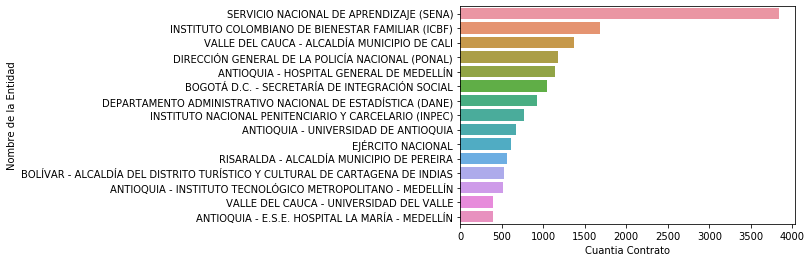

In [0]:
ax = sns.barplot(y="Nombre de la Entidad",x='Cuantia Contrato', data=df2.groupby(["Nombre de la Entidad"]).agg("count").reset_index().sort_values(by='Cuantia Contrato', ascending=False)[0:15])

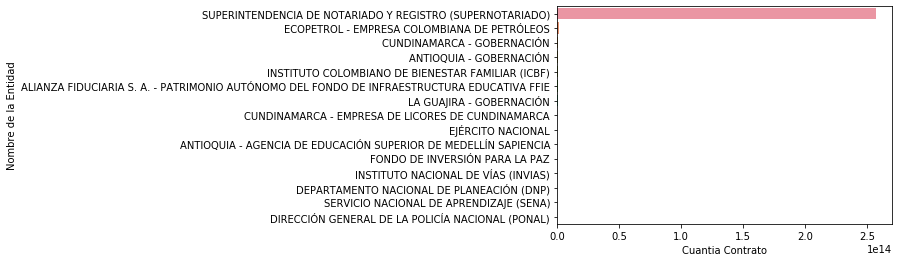

In [0]:
ax = sns.barplot(y="Nombre de la Entidad",x='Cuantia Contrato', data=df2.groupby(["Nombre de la Entidad"]).agg("sum").reset_index().sort_values(by='Cuantia Contrato', ascending=False)[0:15])

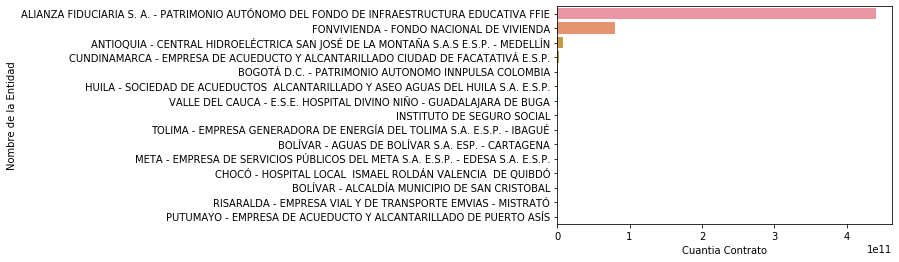

In [0]:
ax = sns.barplot(y="Nombre de la Entidad",x='Cuantia Contrato', data=df2.groupby(["Nombre de la Entidad"]).agg("min").reset_index().sort_values(by='Cuantia Contrato', ascending=False)[0:15])

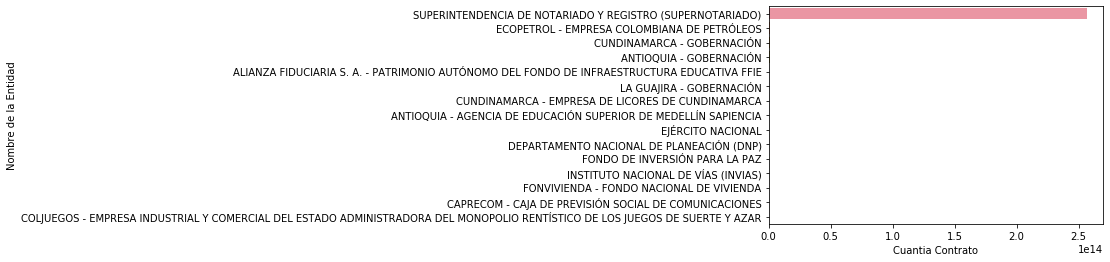

In [0]:
ax = sns.barplot(y="Nombre de la Entidad",x='Cuantia Contrato', data=df2.groupby(["Nombre de la Entidad"]).agg("max").reset_index().sort_values(by='Cuantia Contrato', ascending=False)[0:15])

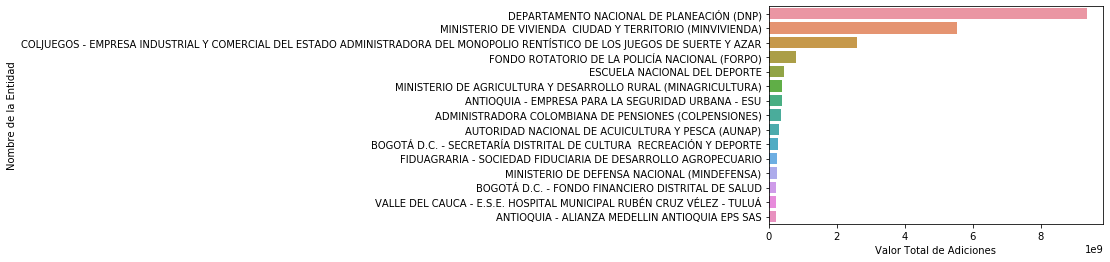

In [0]:
y="Nombre de la Entidad"
x='Valor Total de Adiciones'
ax = sns.barplot(y=y,x=x, data=df2.groupby([y]).agg("mean").reset_index().sort_values(by=x, ascending=False)[0:15])

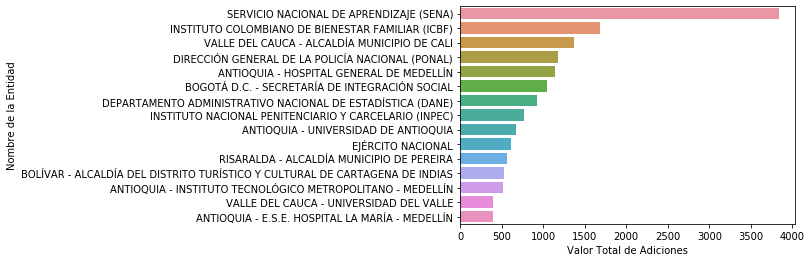

In [0]:
# Nombre entindad contratante
ax = sns.barplot(y=y,x=x, data=df2.groupby([y]).agg("count").reset_index().sort_values(by=x, ascending=False)[0:15])

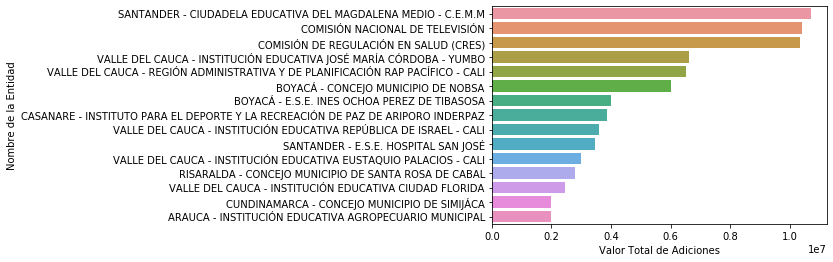

In [0]:
ax = sns.barplot(y=y,x=x, data=df2.groupby([y]).agg("min").reset_index().sort_values(by=x, ascending=False)[0:15])

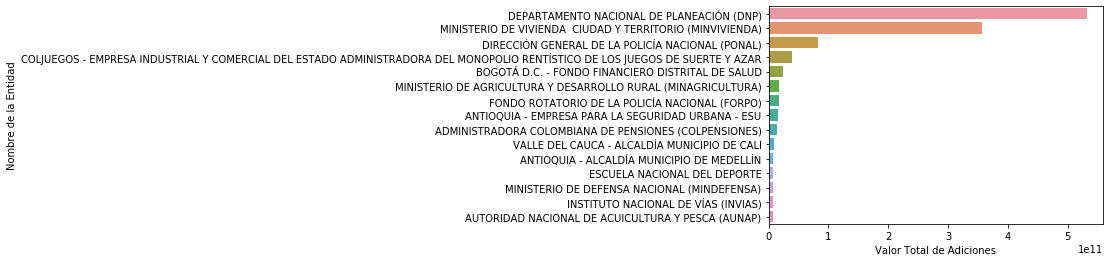

In [0]:
ax = sns.barplot(y=y,x=x, data=df2.groupby([y]).agg("max").reset_index().sort_values(by=x, ascending=False)[0:15])

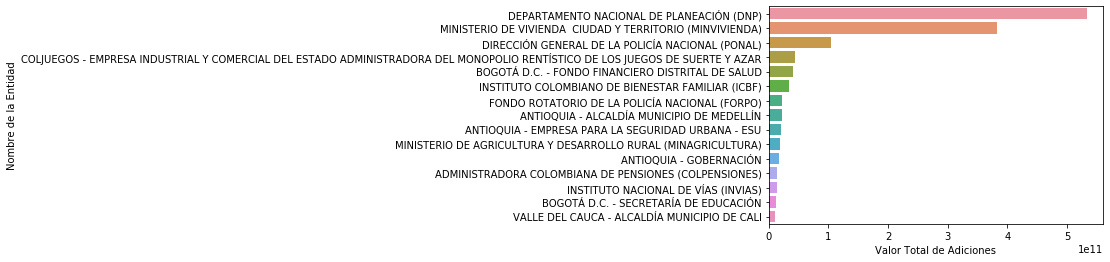

In [0]:
ax = sns.barplot(y=y,x=x, data=df2.groupby([y]).agg("sum").reset_index().sort_values(by=x, ascending=False)[0:15])

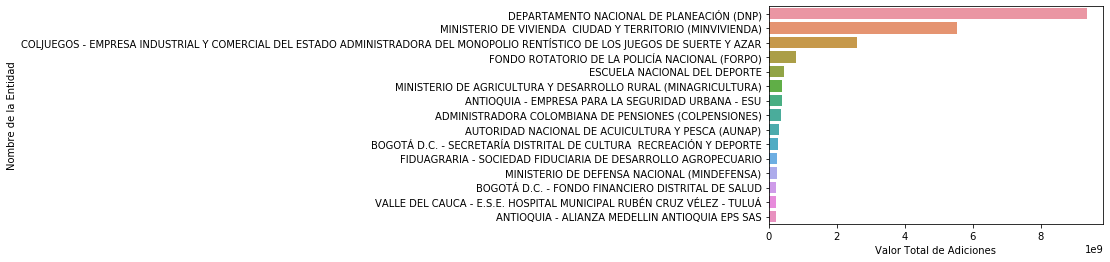

In [0]:
ax = sns.barplot(y=y,x=x, data=df2.groupby([y]).agg("mean").reset_index().sort_values(by=x, ascending=False)[0:15])

In [0]:
### Word Cloud

In [0]:

!pip install wordcloud

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


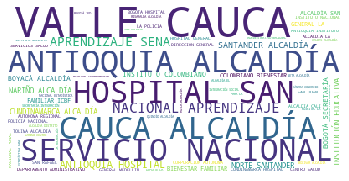

<Figure size 504x504 with 0 Axes>

In [0]:
Contratistas = " ".join(str(contrato) for contrato in df2[y])

stopwords = set(STOPWORDS)
stopwords.update(["DE", "DEL", "SA","SAS", "MUNICIPIO"])

wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(Contratistas)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=[7,7])
plt.show()

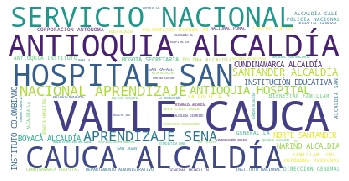

<Figure size 504x504 with 0 Axes>

In [0]:
Contratistas = " ".join(str(contrato) for contrato in df2[y])
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(Contratistas)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=[7,7])
plt.show()

In [0]:
df2.head()

,Unnamed: 0,UID,Anno Cargue SECOP,Anno Firma del Contrato,Nivel Entidad,Orden Entidad,Nombre de la Entidad,NIT de la Entidad,Código de la Entidad,ID Tipo de Proceso,Tipo de Proceso,Estado del Proceso,Causal de Otras Formas de Contratacion Directa,ID Regimen de Contratacion,Regimen de Contratacion,ID Objeto a Contratar,Objeto a Contratar,Detalle del Objeto a Contratar,Tipo de Contrato,Municipio Obtencion,Municipio Entrega,Municipios Ejecucion,Fecha de Cargue en el SECOP,Numero de Constancia,Numero de Proceso,Numero del Contrato,Cuantia Proceso,ID Grupo,Nombre Grupo,ID Familia,Nombre Familia,ID Clase,Nombre Clase,ID Ajudicacion,Tipo Identifi del Contratista,Identificacion del Contratista,Nom Raz Social Contratista,Dpto y Muni Contratista,Tipo Doc Representante Legal,Identific del Represen Legal,Nombre del Represen Legal,Fecha de Firma del Contrato,Fecha Ini Ejec Contrato,Plazo de Ejec del Contrato,Rango de Ejec del Contrato,Tiempo Adiciones en Dias,Tiempo Adiciones en Meses,Fecha Fin Ejec Contrato,Compromiso Presupuestal,Cuantia Contrato,Valor Total de Adiciones,Valor Contrato con Adiciones,Objeto del Contrato a la Firma,ID Origen de los Recursos,Origen de los Recursos,Codigo BPIN,Proponentes Seleccionados,Calificacion Definitiva,ID Sub Unidad Ejecutora,Nombre Sub Unidad Ejecutora,Moneda,EsPostConflicto,Ruta Proceso en SECOP I,Marcacion Adiciones,Posicion Rubro,Nombre Rubro,Valor Rubro,Sexo Representante Legal Proveedor,Pilar Acuerdo Paz,Punto Acuerdo Paz
0,4662076,12-13-1292825-1226974,2012,2012,TERRITORIAL,TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,GUAVIARE - GOBERNACIÓN,800103196-1,NaN,13,Contratación Mínima Cuantía,Liquidado,Ninguna,3,Estatuto General de Contratación,53000000,"Ropa, Maletas y Productos de Aseo Personal",CONTRATAR EL SUMINISTRO DE ELEMENTOS PARA EL F...,Suministro,San José del Guaviare,San José del Guaviare,Guaviare - San José del Guaviare,11/27/2012,12-13-1292825,099,659,"2,000,000.00",E,[E] Productos de Uso Final,0,No Definido,0,No Definido,1226974,Cédula de Ciudadanía,13.858.398,IVAN GARCIA AVILES,Guaviare,Cédula de Ciudadanía,13.858.398,IVAN GARCIA AVILES,04/12/2012,07/12/2012,1,M,0,0,07/01/2013,No registra,1360000.0,0.0,"1,360,000.00",CONTRATAR EL SUMINISTRO DE ELEMENTOS PARA EL F...,0,No definido,-1,No definido,No definido,0,No definida,Pesos (COP),No Definido,https://www.contratos.gov.co/consultas/detalle...,No,No Definido,No Definido,0,ND,No Definido,No Definido
1,5211769,13-4-1635514-1533091,2013,2013,TERRITORIAL,TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,BOGOTÁ D.C. - E.S.E. HOSPITAL SANTA CLARA III ...,860020188-1,NaN,4,Régimen Especial,Celebrado,Ninguna,2,Régimen Especial,85000000,Servicios de Salud,CAMILLERO,Prestación de Servicios,No definido,No definido,Bogotá D.C. - Bogotá D.C.,04/30/2013,13-4-1635514,AS 357 2013,AS 357 2013,"13,172,052.00",F,[F] Servicios,0,No Definido,0,No Definido,1533091,Cédula de Ciudadanía,80761061,ROZO QUINCHIA CARLOS ARTURO,Bogotá D.C.,Cédula de Ciudadanía,80761061,ROZO QUINCHIA CARLOS ARTURO,01/01/2013,01/01/2013,180,D,0,0,01/01/2013,No registra,13172052.0,0.0,"13,172,052.00",CAMILLERO,0,No definido,-1,No definido,No definido,0,No definida,Pesos (COP),No Definido,https://www.contratos.gov.co/consultas/detalle...,No,No Definido,No Definido,0,ND,No Definido,No Definido
2,6451635,15-4-4100682-3791830,2015,2015,TERRITORIAL,TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,ANTIOQUIA - EMPRESA DE SERVICIOS PÚBLICOS DOMI...,811021151-6,NaN,4,Régimen Especial,Celebrado,Ninguna,2,Régimen Especial,72000000,"Servicios de Edificación, Construcción de Inst...",PRESTACIÓN DE SERVICIOS COMO FONTANERO DE LA E...,Prestación de Servicios,Yondó,No definido,Antioquia - Yondó,07/28/2015,15-4-4100682,ESPPS1692015,169-2015,"5,400,000.00",F,[F] Servicios,7215,Servicios de mantenimiento y construcción de c...,721511,Servicios de construcción de plomería,3791830,Cédula de Ciudadanía,3.557.535 Expedida en Yondó,JOSÉ LUIS AVENDAÑO MIRANDA,Antioquia,Cédula de Ciudadanía,3.557.535 Expedida en Yondó,JOSÉ LUI

In [0]:
len(df2["Municipio Obtencion"].unique())

1027